#The model is predicting the sentiment (positive, negative, or neutral) of reviews based on the textual content in the "Review" column of the dataset.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Load dataset
df = pd.read_csv('/content/sentiment_analysis_data.csv')

# Fill NaN values in the 'Review' column with an empty string
df['Review'] = df['Review'].fillna('')

# Perform sentiment analysis using NLTK
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['Review'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative' if sia.polarity_scores(x)['compound'] < 0 else 'neutral')

# Feature Engineering
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['Review'])
y = df['sentiment']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Accuracy: 0.8817471301799235
Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.69      0.77     14855
     neutral       0.85      0.47      0.60     10223
    positive       0.88      0.98      0.93     73186

    accuracy                           0.88     98264
   macro avg       0.87      0.71      0.77     98264
weighted avg       0.88      0.88      0.87     98264



In [25]:
'''
This part of code finds the number of unique ItemCode
Get the top 10 ItemCode with the maximum number of rows
'''

import pandas as pd

# Read the CSV file into a DataFrame
new_comments = pd.read_csv('/content/sentiment_analysis_data.csv', error_bad_lines=False)


# Filter unique values based on the 'ItemCode' column
unique_item_codes = new_comments['ItemCode'].drop_duplicates()

# Count the number of unique values in the 'ItemCode' column
unique_item_codes_count = new_comments['ItemCode'].nunique()

# Print the result
print("Number of unique ItemCode:", unique_item_codes_count)

unique_item_codes_df = new_comments.drop_duplicates(subset='ItemCode')

# Print the unique item codes or the new DataFrame
print(unique_item_codes)

# Get the top 20 ItemCode with the maximum number of rows
top_10_itemcodes = new_comments['ItemCode'].value_counts().head(20)

# Print the result
print("Top 10 ItemCode with the maximum number of rows:")
print(top_10_itemcodes)

<ipython-input-25-8343f2af9afd>:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  new_comments = pd.read_csv('/content/sentiment_analysis_data.csv', error_bad_lines=False)


Number of unique ItemCode: 6289
0         ateoz80EHr
13        bZtFJ6hceT
199       e34197PMOo
270       5BfdKoQsUt
341       ryQGXwhPpq
             ...    
392492    4FL5MGAh9q
392508    FiIw6yHBsm
392702    aRthMqgvNS
392856    ikYOPEmXzL
392956    xhMEXVtHuU
Name: ItemCode, Length: 6289, dtype: object
Top 10 ItemCode with the maximum number of rows:
1aX8othHvc    700
gaWCtiRAQM    700
kvu8K6b7lp    700
1mhLBwsfPx    700
S9lsdanMmz    700
YruZFmgn9S    700
JZxmdT5atP    700
cBfZN8gd2Y    700
IrNyBtfKLZ    700
FB5DMY8pUG    669
VZlRpTAUeN    669
RxGerC3opY    669
vPl3V7DAFW    658
l81xtgVOoS    645
BpvGYAMKST    640
5ZsXt46GjY    600
pXYqCyQskN    557
oZEW8uhPKq    522
rAxePIqNF3    500
oNHqUh1wfk    500
Name: ItemCode, dtype: int64


#Finding the common issues mentioned in Reviews using using NLTK's Bag of Words Approach

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-21-8fb13bd3e9a8>:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  new_comments = pd.read_csv('/content/sentiment_analysis_data.csv', error_bad_lines=False)


Number of negative comments: 39
All sentiments in the DataFrame: ['positive' 'neutral' 'negative']

Common Issues in Negative Comments for ItemCode oNHqUh1wfk:
very: 16 mentions
quality: 16 mentions
not: 13 mentions
bad: 11 mentions
is: 10 mentions


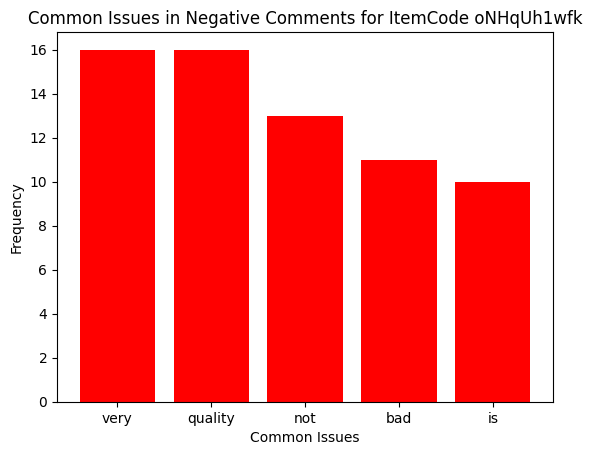

In [21]:
'''
This part code is used for Finding the common issues mentioned in Reviews
using NLTK's Bag of Words Approach
'''

import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

# Load new comments for sentiment analysis
new_comments = pd.read_csv('/content/sentiment_analysis_data.csv', error_bad_lines=False)


selected_itemcode = 'oNHqUh1wfk'

# Filter DataFrame for the specified ItemCode
selected_comments = new_comments[new_comments['ItemCode'] == selected_itemcode].copy()

# Convert text data to lowercase
selected_comments['Review'] = selected_comments['Review'].str.lower()

# Perform sentiment analysis using NLTK's VADER
sia = SentimentIntensityAnalyzer()
selected_comments['sentiment'] = selected_comments['Review'].apply(lambda x: 'positive' if sia.polarity_scores(x)['compound'] > 0 else 'negative' if sia.polarity_scores(x)['compound'] < 0 else 'neutral')

# Identify negative comments
negative_selected_comments = selected_comments[selected_comments['sentiment'] == 'negative']

# Print some debugging information
print("Number of negative comments:", len(negative_selected_comments))
print("All sentiments in the DataFrame:", selected_comments['sentiment'].unique())

# Analyze common issues in negative comments
common_issues = Counter(" ".join(negative_selected_comments['Review']).split()).most_common(5)

# Check if common_issues is not empty before unpacking
if common_issues:
    # Present Suggestions to the Manufacturer
    print(f"\nCommon Issues in Negative Comments for ItemCode {selected_itemcode}:")
    for issue, count in common_issues:
        print(f"{issue}: {count} mentions")

    # Plot a bar chart for common issues
    issues, counts = zip(*common_issues)
    plt.bar(issues, counts, color='red')
    plt.xlabel('Common Issues')
    plt.ylabel('Frequency')
    plt.title(f'Common Issues in Negative Comments for ItemCode {selected_itemcode}')
    plt.show()
else:
    print("No common issues found in negative comments.")

